# Question 1

In [21]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
df = pd.read_csv (r'titanic_data.csv')

In [7]:
df.head()

,PassengerId,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1313 non-null   int64  
 1   Name         1313 non-null   object 
 2   PClass       1313 non-null   object 
 3   Age          756 non-null    float64
 4   Sex          1313 non-null   object 
 5   Survived     1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


# Question 2

In [8]:
# Check if the values in the 'PassengerId' column are unique
if df['PassengerId'].is_unique:
    # Set the 'PassengerId' column as the index of the dataframe
    df.set_index('PassengerId', inplace=True)

# Question 3

In [9]:
# Add a new 'SexCode' column to the dataframe
df['SexCode'] = 0

# Set the value of 'SexCode' to 1 if the corresponding value in the 'Sex' column is 'female'
df['SexCode'] = df['SexCode'].where(df['Sex'] != 'female', 1)

In [10]:
df.head()

,Name,PClass,Age,Sex,Survived,SexCode
PassengerId,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


# Question 4

In [13]:
# Convert the values in the 'PClass' column to integers
df['PClass'] = df['PClass'].replace(['1st', '2nd','3rd'], ['1', '2','3'])

In [17]:
df.head(20)

,Name,PClass,Age,Sex,Survived,SexCode
PassengerId,,,,,,
1,"Allen, Miss Elisabeth Walton",1,29.000000,female,1,1
2,"Allison, Miss Helen Loraine",1,2.000000,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1,30.000000,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.000000,female,0,1
5,"Allison, Master Hudson Trevor",1,0.920000,male,1,0
6,"Anderson, Mr Harry",1,47.000000,male,1,0
7,"Andrews, Miss Kornelia Theodosia",1,63.000000,female,1,1
8,"Andrews, Mr Thomas, jr",1,39.000000,male,0,0
9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1,58.000000,female,1,1


# Question 5

In [15]:
# Count the number of missing values in the 'Age' column
num_missing = df['Age'].isnull().sum()

# Calculate the average value of the 'Age' column
average_age = df['Age'].mean()

# Replace the missing values with the average value
df['Age'].fillna(average_age, inplace=True)

In [20]:
df.head(25)

,Name,PClass,Age,Sex,Survived,SexCode
PassengerId,,,,,,
1,"Allen, Miss Elisabeth Walton",1,29.000000,female,1,1
2,"Allison, Miss Helen Loraine",1,2.000000,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1,30.000000,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.000000,female,0,1
5,"Allison, Master Hudson Trevor",1,0.920000,male,1,0
6,"Anderson, Mr Harry",1,47.000000,male,1,0
7,"Andrews, Miss Kornelia Theodosia",1,63.000000,female,1,1
8,"Andrews, Mr Thomas, jr",1,39.000000,male,0,0
9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1,58.000000,female,1,1


# Question 6

In [16]:
# Calculate the number of females and males
counts = df.groupby('Sex')['Sex'].count()

# Calculate the average age of females and males
averages = df.groupby('Sex')['Age'].mean()

print(counts)
print(averages)

Sex
female    462
male      851
Name: Sex, dtype: int64
Sex
female    29.773637
male      30.736945
Name: Age, dtype: float64


# Question 7

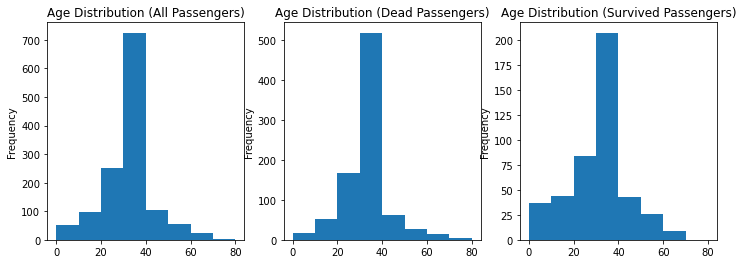

In [18]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Histogram of the age distribution for all passengers
df['Age'].plot.hist(bins=range(0, 90, 10), ax=ax1)
ax1.set_title('Age Distribution (All Passengers)')

# Histogram of the age distribution for dead passengers
df[df['Survived'] == 0]['Age'].plot.hist(bins=range(0, 90, 10), ax=ax2)
ax2.set_title('Age Distribution (Dead Passengers)')

# Histogram of the age distribution for survived passengers
df[df['Survived'] == 1]['Age'].plot.hist(bins=range(0, 90, 10), ax=ax3)
ax3.set_title('Age Distribution (Survived Passengers)')

# Show the plot
plt.show()

# Question 8 

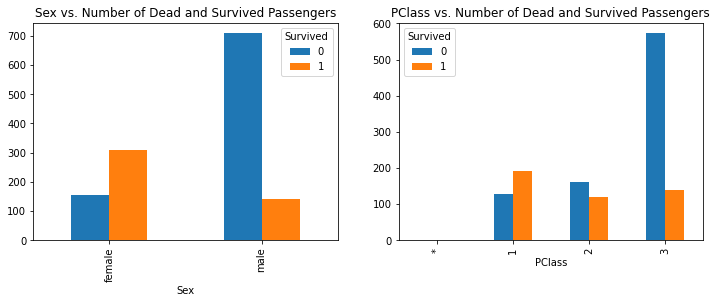

In [19]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot of sex vs. number of dead and survived passengers
sex_counts = df.groupby(['Sex', 'Survived'])['Sex'].count().unstack()
sex_counts.plot.bar(ax=ax1)
ax1.set_title('Sex vs. Number of Dead and Survived Passengers')

# Bar plot of PClass vs. number of dead and survived passengers
pclass_counts = df.groupby(['PClass', 'Survived'])['PClass'].count().unstack()
pclass_counts.plot.bar(ax=ax2)
ax2.set_title('PClass vs. Number of Dead and Survived Passengers')

# Show the plot
plt.show()